In [3]:
import sys
sys.path.insert(0, "/home/pwahle/proliferating_RGC/")

import yaml
import importlib
import modules
importlib.reload(modules)
import os
from pathlib import Path
import subprocess

# load global variables and parameters
with open("../params.yml", 'r') as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)

globals().update(cfg)
r_path = str(Path('/usr/local/R-4.0.3/bin/Rscript'))  # path to r interpreter

from scipy import ndimage
import re
import cv2
from scipy import ndimage as ndi
import copy
import numpy as np
import matplotlib as mpl
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

In [4]:
path = data_path + 'exp4/'

In [5]:
from bs4 import BeautifulSoup
from bs4 import BeautifulStoneSoup 
with open(path + 'multipoints.xml', 'rb') as f:
#with open('GFG.xml', 'rb') as f:
    data = f.read()
Bs_data = BeautifulSoup(data, "xml")

with open(path + 'multipoints_after.xml', 'rb') as f:
#with open('GFG.xml', 'rb') as f:
    data = f.read()
Bs_after = BeautifulSoup(data, "xml")

In [6]:
def get_plane_func(p1,p2,p3):
    v1 = p3 - p1
    v2 = p2 - p1
    
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    d = np.dot(cp, p3)
    
    return cp,d

def project_point(a,b,c,d,x,y,z):
    return ax+by+cz-d


def calculate_rotation_matrix(P1, P2, P3, P1_prime, P2_prime, P3_prime):
    # Calculate the normal vectors of the planes
    N = np.cross(P2 - P1, P3 - P1)
    N_prime = np.cross(P2_prime - P1_prime, P3_prime - P1_prime)

    # Normalize the normal vectors
    N_normalized = N / np.linalg.norm(N)
    N_prime_normalized = N_prime / np.linalg.norm(N_prime)

    # Calculate the second column of the rotation matrix
    V = np.cross(N, N_normalized)
    V_normalized = V / np.linalg.norm(V)

    # Construct the rotation matrix
    R = np.column_stack((N_normalized, V_normalized, N_prime_normalized))

    return R


In [7]:
a1 = np.array([float(Bs_data.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_data.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_data.find_all('dZPosition', {'runtype':'double'})[0]['value'])])
a2 = np.array([float(Bs_data.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_data.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_data.find_all('dZPosition', {'runtype':'double'})[1]['value'])])
a3 = np.array([float(Bs_data.find_all('dXPosition', {'runtype':'double'})[2]['value']),float(Bs_data.find_all('dYPosition', {'runtype':'double'})[2]['value']),float(Bs_data.find_all('dZPosition', {'runtype':'double'})[2]['value'])])


b1 = np.array([float(Bs_after.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_after.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_after.find_all('dZPosition', {'runtype':'double'})[0]['value'])])
b2 = np.array([float(Bs_after.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_after.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_after.find_all('dZPosition', {'runtype':'double'})[1]['value'])])
b3 = np.array([float(Bs_after.find_all('dXPosition', {'runtype':'double'})[2]['value']),float(Bs_after.find_all('dYPosition', {'runtype':'double'})[2]['value']),float(Bs_after.find_all('dZPosition', {'runtype':'double'})[2]['value'])])

plane1 = get_plane_func(a1,a2,a3)
plane2 = get_plane_func(b1,b2,b3)

calculate_rotation_matrix(P1 = a1, P2 = a2, P3 = a3, P1_prime = b1, P2_prime = b2, P3_prime = b3)

# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)

print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(5,
        5,
        5, 'bo ')

ax.plot(*zip(p1, p2, p3), color='r', linestyle=' ', marker='o')

# adjust the view so we can see the point/plane alignment
ax.view_init(0, 22)
plt.tight_layout()
plt.show()

/home/pwahle/anaconda3/envs/retina/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


NameError: name 'cp' is not defined

In [8]:
xpos = Bs_after.find_all('dXPosition')
ypos = Bs_after.find_all('dYPosition')
zpos = Bs_after.find_all('dZPosition')
ypos

[<dYPosition runtype="double" value="5639.500000000000000"/>,
 <dYPosition runtype="double" value="14224.200000000000728"/>,
 <dYPosition runtype="double" value="1487.900000000000091"/>,
 <dYPosition runtype="double" value="8398.800000000001091"/>,
 <dYPosition runtype="double" value="8001.900000000000546"/>,
 <dYPosition runtype="double" value="8445.399999999999636"/>,
 <dYPosition runtype="double" value="8547.200000000000728"/>,
 <dYPosition runtype="double" value="8480.399999999999636"/>,
 <dYPosition runtype="double" value="4130.699999999999818"/>,
 <dYPosition runtype="double" value="4481.500000000000000"/>,
 <dYPosition runtype="double" value="4853.300000000000182"/>,
 <dYPosition runtype="double" value="4949.600000000000364"/>,
 <dYPosition runtype="double" value="-1081.700000000000045"/>,
 <dYPosition runtype="double" value="-947.400000000000091"/>,
 <dYPosition runtype="double" value="-295.900000000000034"/>,
 <dYPosition runtype="double" value="117.800000000000011"/>]

In [9]:
xpos

[<dXPosition runtype="double" value="43652.900000000001455"/>,
 <dXPosition runtype="double" value="10131.800000000001091"/>,
 <dXPosition runtype="double" value="6281.200000000000728"/>,
 <dXPosition runtype="double" value="14539.500000000000000"/>,
 <dXPosition runtype="double" value="14954.200000000000728"/>,
 <dXPosition runtype="double" value="14150.900000000001455"/>,
 <dXPosition runtype="double" value="13708.400000000001455"/>,
 <dXPosition runtype="double" value="14466.400000000001455"/>,
 <dXPosition runtype="double" value="26396.400000000001455"/>,
 <dXPosition runtype="double" value="26350.100000000002183"/>,
 <dXPosition runtype="double" value="26327.900000000001455"/>,
 <dXPosition runtype="double" value="26280.200000000000728"/>,
 <dXPosition runtype="double" value="38020.400000000001455"/>,
 <dXPosition runtype="double" value="38032.900000000001455"/>,
 <dXPosition runtype="double" value="38068.300000000002910"/>,
 <dXPosition runtype="double" value="37997.3000000000029

In [10]:
zpos

[<dZPosition runtype="double" value="5215.749999999999091"/>,
 <dZPosition runtype="double" value="5376.599999999999454"/>,
 <dZPosition runtype="double" value="5394.049999999999272"/>,
 <dZPosition runtype="double" value="5252.929999999999382"/>,
 <dZPosition runtype="double" value="5259.109999999998763"/>,
 <dZPosition runtype="double" value="5259.449999999998909"/>,
 <dZPosition runtype="double" value="5223.789999999999964"/>,
 <dZPosition runtype="double" value="5230.710000000000036"/>,
 <dZPosition runtype="double" value="5222.599999999999454"/>,
 <dZPosition runtype="double" value="5200.690000000000509"/>,
 <dZPosition runtype="double" value="5225.929999999999382"/>,
 <dZPosition runtype="double" value="5226.619999999998981"/>,
 <dZPosition runtype="double" value="5213.079999999999018"/>,
 <dZPosition runtype="double" value="5209.329999999999018"/>,
 <dZPosition runtype="double" value="5207.749999999999091"/>,
 <dZPosition runtype="double" value="5206.709999999999127"/>]

In [11]:
for tag in Bs_data.find_all('dYPosition', {'runtype':'double'}):
    tag['value'] = str(float(tag['value'])/100)
ypos

[<dYPosition runtype="double" value="5639.500000000000000"/>,
 <dYPosition runtype="double" value="14224.200000000000728"/>,
 <dYPosition runtype="double" value="1487.900000000000091"/>,
 <dYPosition runtype="double" value="8398.800000000001091"/>,
 <dYPosition runtype="double" value="8001.900000000000546"/>,
 <dYPosition runtype="double" value="8445.399999999999636"/>,
 <dYPosition runtype="double" value="8547.200000000000728"/>,
 <dYPosition runtype="double" value="8480.399999999999636"/>,
 <dYPosition runtype="double" value="4130.699999999999818"/>,
 <dYPosition runtype="double" value="4481.500000000000000"/>,
 <dYPosition runtype="double" value="4853.300000000000182"/>,
 <dYPosition runtype="double" value="4949.600000000000364"/>,
 <dYPosition runtype="double" value="-1081.700000000000045"/>,
 <dYPosition runtype="double" value="-947.400000000000091"/>,
 <dYPosition runtype="double" value="-295.900000000000034"/>,
 <dYPosition runtype="double" value="117.800000000000011"/>]

In [12]:
i = 0
for tag in Bs_data.find_all('dZPosition', {'runtype':'double'}):
    tag['value'] = str(i)
    i+=1

In [13]:
with open(path + "test.xml", "w") as f:
    f.write(Bs_data.prettify())

The equation is 30x + -48y + 17z = -15


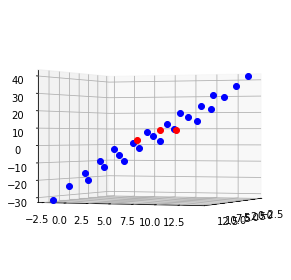

In [19]:
#############
import np as np

p1 = np.array([1, 2, 3])
p2 = np.array([4, 6, 9])
p3 = np.array([12, 11, 9])

# These two vectors are in the plane
v1 = p3 - p1
v2 = p2 - p1

# the cross product is a vector normal to the plane
cp = np.cross(v1, v2)
a, b, c = cp

# This evaluates a * x3 + b * y3 + c * z3 which equals d
d = np.dot(cp, p3)

print('The equation is {0}x + {1}y + {2}z = {3}'.format(a, b, c, d))

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 14, 5)
y = np.linspace(-2, 14, 5)
X, Y = np.meshgrid(x, y)

Z = (d - a * X - b * Y) / c

# plot the mesh. Each array is 2D, so we flatten them to 1D arrays
ax.plot(X.flatten(),
        Y.flatten(),
        Z.flatten(), 'bo ')

# plot the original points. We use zip to get 1D lists of x, y and z
# coordinates.
ax.plot(*zip(p1, p2, p3), color='r', linestyle=' ', marker='o')

# adjust the view so we can see the point/plane alignment
ax.view_init(0, 22)
plt.tight_layout()
plt.show()

In [7]:
import np as np

def translate_point(P1, P2, P3, P4, P4_original):
    # Calculate the translation vector
    T = P2 - P1

    # Calculate the rotation matrix
    R = np.linalg.inv(np.vstack((P2 - P1, P3 - P1, np.cross(P2 - P1, P3 - P1)))).T

    # Apply the translation and rotation to the fourth point
    P4_new = R @ (P4_original - P1) + T + P1

    return P4_new

# Example coordinates of three reference points before rotation
P1 = np.array([1, 2, 3])
P2 = np.array([4, 5, 6])
P3 = np.array([7, 8, 9])

# Example coordinates of the fourth point before rotation
P4_original = np.array([10, 11, 12])

# Example coordinates of three reference points after rotation
P1_updated = np.array([2, 4, 6])
P2_updated = np.array([5, 7, 9])
P3_updated = np.array([8, 10, 12])

# Calculate the translated coordinates of the fourth point
P4_new = translate_point(P1_updated, P2_updated, P3_updated, P4_original, P4_original)

# Print the translated coordinates of the fourth point
print("Translated coordinates of the fourth point:", P4_new)

LinAlgError: Singular matrix

In [102]:
def affine_matrix_from_points(v0, v1, shear=True, scale=True, usesvd=True):

    v0 = np.array(v0, dtype=np.float64, copy=True)
    v1 = np.array(v1, dtype=np.float64, copy=True)

    ndims = v0.shape[0]
    if ndims < 2 or v0.shape[1] < ndims or v0.shape != v1.shape:
        raise ValueError("input arrays are of wrong shape or type")

    # move centroids to origin
    t0 = -np.mean(v0, axis=1)
    M0 = np.identity(ndims+1)
    M0[:ndims, ndims] = t0
    v0 += t0.reshape(ndims, 1)
    t1 = -np.mean(v1, axis=1)
    M1 = np.identity(ndims+1)
    M1[:ndims, ndims] = t1
    v1 += t1.reshape(ndims, 1)

    if shear:
        # Affine transformation
        A = np.concatenate((v0, v1), axis=0)
        u, s, vh = np.linalg.svd(A.T)
        vh = vh[:ndims].T
        B = vh[:ndims]
        C = vh[ndims:2*ndims]
        t = np.dot(C, np.linalg.pinv(B))
        t = np.concatenate((t, np.zeros((ndims, 1))), axis=1)
        M = np.vstack((t, ((0.0,)*ndims) + (1.0,)))
    elif usesvd or ndims != 3:
        # Rigid transformation via SVD of covariance matrix
        u, s, vh = np.linalg.svd(np.dot(v1, v0.T))
        # rotation matrix from SVD orthonormal bases
        R = np.dot(u, vh)
        if np.linalg.det(R) < 0.0:
            # R does not constitute right handed system
            R -= np.outer(u[:, ndims-1], vh[ndims-1, :]*2.0)
            s[-1] *= -1.0
        # homogeneous transformation matrix
        M = np.identity(ndims+1)
        M[:ndims, :ndims] = R
    else:
        # Rigid transformation matrix via quaternion
        # compute symmetric matrix N
        xx, yy, zz = np.sum(v0 * v1, axis=1)
        xy, yz, zx = np.sum(v0 * np.roll(v1, -1, axis=0), axis=1)
        xz, yx, zy = np.sum(v0 * np.roll(v1, -2, axis=0), axis=1)
        N = [[xx+yy+zz, 0.0,      0.0,      0.0],
             [yz-zy,    xx-yy-zz, 0.0,      0.0],
             [zx-xz,    xy+yx,    yy-xx-zz, 0.0],
             [xy-yx,    zx+xz,    yz+zy,    zz-xx-yy]]
        # quaternion: eigenvector corresponding to most positive eigenvalue
        w, V = np.linalg.eigh(N)
        q = V[:, np.argmax(w)]
        q /= vector_norm(q)  # unit quaternion
        # homogeneous transformation matrix
        M = quaternion_matrix(q)

    if scale and not shear:
        # Affine transformation; scale is ratio of RMS deviations from centroid
        v0 *= v0
        v1 *= v1
        M[:ndims, :ndims] *= math.sqrt(np.sum(v1) / np.sum(v0))

    # move centroids back
    M = np.dot(np.linalg.inv(M1), np.dot(M, M0))
    M /= M[ndims, ndims]
    return M

def superimposition_matrix(v0, v1, scale=False, usesvd=True):

    v0 = np.array(v0, dtype=np.float64, copy=False)[:3]
    v1 = np.array(v1, dtype=np.float64, copy=False)[:3]
    return affine_matrix_from_points(v0, v1, shear=False,
                                     scale=scale, usesvd=usesvd)

In [193]:
v0 = [[0, 1031, 1031, 0], [0, 0, 1600, 1600]]
v1 = [[675, 826, 826, 677], [55, 52, 281, 277]]
a1 = np.array([float(Bs_data.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_data.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_data.find_all('dXPosition', {'runtype':'double'})[2]['value'])])
a2 = np.array([float(Bs_data.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_data.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_data.find_all('dYPosition', {'runtype':'double'})[2]['value'])])
a3 = np.array([float(Bs_data.find_all('dZPosition', {'runtype':'double'})[0]['value']),float(Bs_data.find_all('dZPosition', {'runtype':'double'})[1]['value']),float(Bs_data.find_all('dZPosition', {'runtype':'double'})[2]['value'])])
v0 = np.array([a1,a2,a3])

b1 = np.array([float(Bs_after.find_all('dXPosition', {'runtype':'double'})[0]['value']),float(Bs_after.find_all('dXPosition', {'runtype':'double'})[1]['value']),float(Bs_after.find_all('dXPosition', {'runtype':'double'})[2]['value'])])
b2 = np.array([float(Bs_after.find_all('dYPosition', {'runtype':'double'})[0]['value']),float(Bs_after.find_all('dYPosition', {'runtype':'double'})[1]['value']),float(Bs_after.find_all('dYPosition', {'runtype':'double'})[2]['value'])])
b3 = np.array([float(Bs_after.find_all('dZPosition', {'runtype':'double'})[0]['value']),float(Bs_after.find_all('dZPosition', {'runtype':'double'})[1]['value']),float(Bs_after.find_all('dZPosition', {'runtype':'double'})[2]['value'])])
v1 = np.array([b1,b2,b3])

#bX = []
#for i in Bs_after.find_all('dXPosition', {'runtype':'double'}):
#    bX.append(float(i['value']))
#bY = []
#for i in Bs_after.find_all('dYPosition', {'runtype':'double'}):
#    bY.append(float(i['value']))
#bZ = []
#for i in Bs_after.find_all('dZPosition', {'runtype':'double'}):
#    bZ.append(float(i['value']))
#v1 = np.array([np.array(bX),np.array(bY),np.array(bZ)])
T = affine_matrix_from_points(v0, v1,shear=False, scale=False, usesvd=True)
#MAT = superimposition_matrix(v0, v1, scale=False, usesvd=True)

In [234]:
p1 = float(Bs_data.find_all('dXPosition', {'runtype':'double'})[4]['value'])
p2 = float(Bs_data.find_all('dYPosition', {'runtype':'double'})[4]['value'])
p3 = float(Bs_data.find_all('dZPosition', {'runtype':'double'})[4]['value'])




v3 = np.array([p1,p2,p3,1])

In [222]:
np.matmul(v3,T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [183]:
def project_point(point, transformation_matrix):
    # Convert point to homogeneous coordinates
    point_homogeneous = np.append(point, 1)

    # Apply the transformation matrix
    transformed_point = np.dot(transformation_matrix, point_homogeneous)

    # Perform perspective division
    projected_point_homogeneous = transformed_point / transformed_point[3]

    # Extract the 3D coordinates
    projected_point = projected_point_homogeneous[:3]

    return projected_point

# Example 4x4 homogeneous transformation matrix
transformation_matrix = np.array([[0.866, -0.5, 0, 1],
                                  [0.5, 0.866, 0, 2],
                                  [0, 0, 1, 3],
                                  [0, 0, 0, 1]])

# Example 3D point to be projected
point = np.array([1, 2, 3])

# Project the point using the transformation matrix
projected_point = project_point(v3, transformation_matrix)